In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
from sklearn.model_selection import train_test_split
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
from sklearn.model_selection import train_test_split
# from sklearn.decomposition import IncrementalPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.base import clone
import seaborn as sns
from datetime import datetime
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#mat_file = io.loadmat('/content/drive/MyDrive/KAIST/[CS485]MachineLearning4AI/face.mat')
mat_file = io.loadmat('./face.mat')
mat_file

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat May 27 02:07:24 2006',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[106, 130, 191, ...,  70, 183,  77],
        [103, 129, 185, ...,  62, 250,  72],
        [103, 130, 174, ...,  83, 163,  68],
        ...,
        [ 37,  40,  22, ...,  87, 102,  93],
        [ 36,  36,  19, ...,  89,  95, 103],
        [ 41,  35,  17, ...,  94, 106, 110]], dtype=uint8),
 'l': array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
          4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
         12, 12, 12, 12, 12, 12, 12, 12, 13,

In [ ]:
X_shape = mat_file['X'].shape
y_shape = mat_file['l'].shape

print('X shape: ', X_shape)
print('y shape: ', y_shape)

X shape:  (2576, 520)
y shape:  (1, 520)


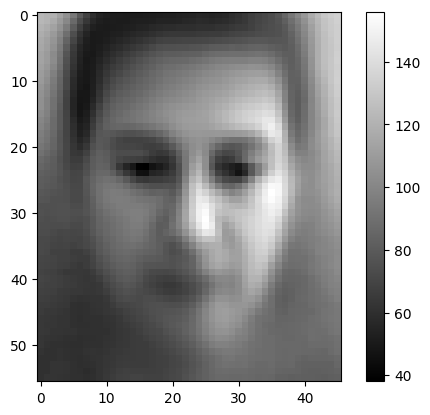

In [ ]:
mean_face = np.mean(mat_file['X'], axis=1)
mean_face_dis = np.reshape(mean_face, (46, 56))
plt.imshow(mean_face_dis.T, cmap='gist_gray')
plt.colorbar()
plt.show()

In [ ]:
data = mat_file['X']
labels = mat_file['l']
num_individuals = 52
num_images_per_individual = 10
train_set = []
train_labels = []
test_set = []
test_labels = []

for i in range(num_individuals):
    individual_images = []
    individual_labels = []
    for j in range(num_images_per_individual):
        img = np.reshape(data[:, i * 10 + j], (46, 56))
        individual_images.append(np.array(img).flatten())
        individual_labels.append(labels[0, i * 10 + j])

    train, test, train_label, test_label = train_test_split(individual_images, individual_labels, test_size=0.2, random_state=1004)
    train_set.extend(train)
    train_labels.extend(train_label)
    test_set.extend(test)
    test_labels.extend(test_label)

train_set = np.array(train_set).T
test_set = np.array(test_set).T

print('train_set shape: ', train_set.shape)
print('test_set shape: ', test_set.shape)

train_set shape:  (2576, 416)
test_set shape:  (2576, 104)


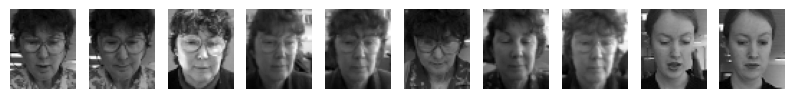

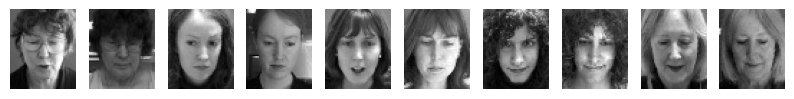

In [ ]:
#SHOWING THE FIRST 10 TRAINING IMAGES
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    fig.add_subplot(1, 10, i + 1)
    plt.imshow(np.reshape(train_set[:, i], (46, 56)).T, cmap='gist_gray')
    plt.axis('off')
plt.show()
#SHOWING THE FIRST 10 TESTING IMAGES
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    fig.add_subplot(1, 10, i + 1)
    plt.imshow(np.reshape(test_set[:, i], (46, 56)).T, cmap='gist_gray')
    plt.axis('off')

Q1

In [ ]:
#apply PCA to training set
train_set_mean = np.mean(train_set, axis=1)
train_set_centered = (train_set.T - train_set_mean).T
start_time = time.time()
train_cov = 1/(train_set_centered.shape[1]) * train_set_centered.dot(train_set_centered.T)
train_eig_val, train_eig_vec = np.linalg.eig(train_cov)
end_time = time.time()
print('Time taken to compute eigenvectors through PCA: ', end_time - start_time)

#shape of eigenvectors
print('train_eig_vec shape: ', train_eig_vec.shape)

Time taken to compute eigenvectors through PCA:  20.544989585876465
train_eig_vec shape:  (2576, 2576)


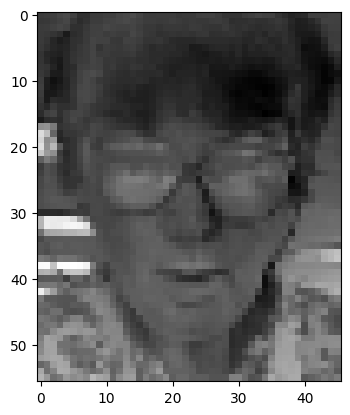

In [ ]:
plt.imshow(np.reshape(train_set_centered[:, 0], (46, 56)).T, cmap='gist_gray')

<ipython-input-18-357836f78e09>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(np.reshape(train_eig_vec[:, i].astype(np.float64), (46, 56)).T, cmap='gist_gray')


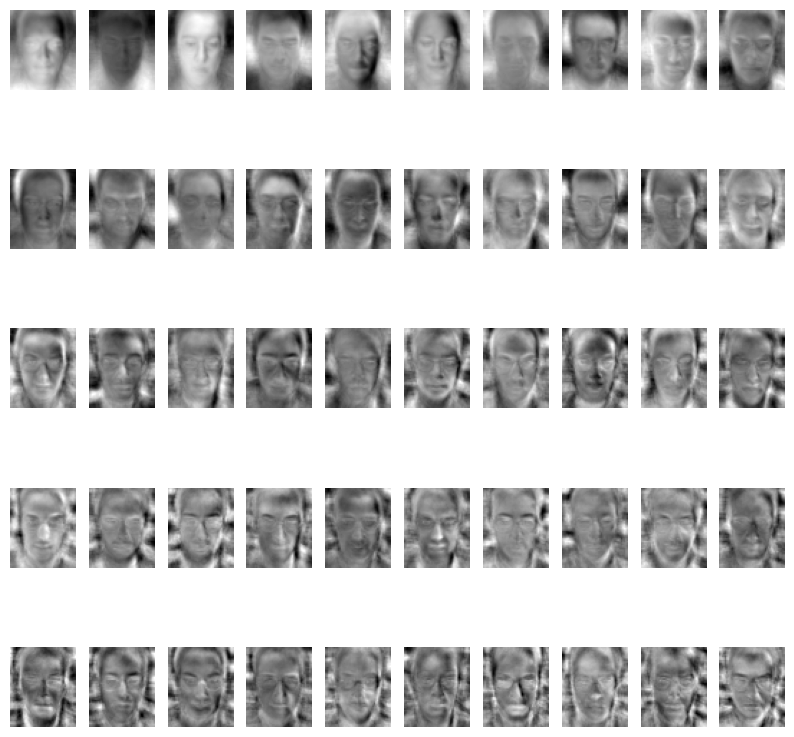

In [ ]:
#display the first 50 eigenfaces
fig = plt.figure(figsize=(10, 10))
for i in range(50):
    fig.add_subplot(5, 10, i + 1)
    plt.imshow(np.reshape(train_eig_vec[:, i].astype(np.float64), (46, 56)).T, cmap='gist_gray')
    plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


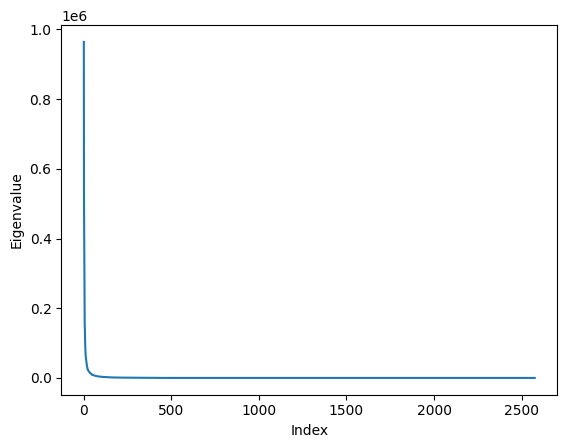

In [ ]:
#plot the eigenvalues with respect to the index
plt.plot(train_eig_val)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.show()

In [ ]:
#count the number of non-zero eigenvalues
count = 0
for i in range(len(train_eig_val)):
    if train_eig_val[i] >=1:
        count += 1
print('number of non-zero real eigenvalues: ', count)

#print the zero eigenvalues
for i in range(len(train_eig_val)):
    if train_eig_val[i] < 1:
        print('eigenvalue index: ', i, 'eigenvalue: ', train_eig_val[i])

number of non-zero real eigenvalues:  415
eigenvalue index:  415 eigenvalue:  (-4.7263368802757296e-11+0j)
eigenvalue index:  416 eigenvalue:  (4.6034759971652484e-11+0j)
eigenvalue index:  417 eigenvalue:  (4.131086356286057e-11+0j)
eigenvalue index:  418 eigenvalue:  (-4.0387632297619473e-11+0j)
eigenvalue index:  419 eigenvalue:  (-3.631393316562849e-11+0j)
eigenvalue index:  420 eigenvalue:  (3.467145939881656e-11+0j)
eigenvalue index:  421 eigenvalue:  (2.6591920070428043e-11+0j)
eigenvalue index:  422 eigenvalue:  (-2.7451085697715033e-11+0j)
eigenvalue index:  423 eigenvalue:  (-2.6849818573765403e-11+0j)
eigenvalue index:  424 eigenvalue:  (2.5456032695334003e-11+9.623742243479976e-13j)
eigenvalue index:  425 eigenvalue:  (2.5456032695334003e-11-9.623742243479976e-13j)
eigenvalue index:  426 eigenvalue:  (-2.5678552023362375e-11+0j)
eigenvalue index:  427 eigenvalue:  (-1.84775626542119e-11+1.652423656146205e-11j)
eigenvalue index:  428 eigenvalue:  (-1.84775626542119e-11-1.652

In [ ]:
#apply low PCA to training set
start_time = time.time()
train_cov_2 = 1/(train_set_centered.shape[1]) * train_set_centered.T.dot(train_set_centered)
train_eig_val_2, train_eig_vec_2 = np.linalg.eig(train_cov_2)
end_time = time.time()
print('Time taken to compute eigenvectors through low PCA: ', end_time - start_time)


#shape
print('train_eig_val_2 shape: ', train_eig_val_2.shape)
print('train_eig_vec_2 shape: ', train_eig_vec_2.shape)

Time taken to compute eigenvectors through low PCA:  0.329817533493042
train_eig_val_2 shape:  (416,)
train_eig_vec_2 shape:  (416, 416)


In [ ]:
#count the number of non-zero eigenvalues
count_2 = 0
for i in range(len(train_eig_val_2)):
    if train_eig_val_2[i] >=1:
        count_2 += 1
print('number of non-zero real eigenvalues: ', count_2)

#find the zero eigenvalues
for i in range(len(train_eig_val_2)):
    if train_eig_val_2[i] < 1:
        print(f"Zero-eigenvalue: {train_eig_val_2[i]}")

number of non-zero real eigenvalues:  415
Zero-eigenvalue: 1.6150208205798124e-11


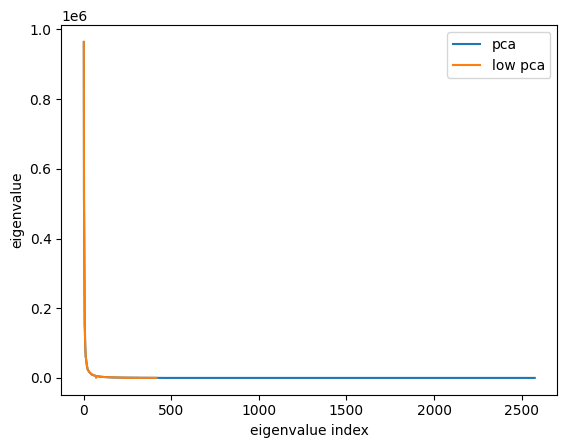

In [ ]:
#plot pca and low pca eigenvalues
plt.plot(train_eig_val, label='pca')
plt.plot(train_eig_val_2, label='low pca')
plt.xlabel('eigenvalue index')
plt.ylabel('eigenvalue')
plt.legend()
plt.show()

In [ ]:
#calculate principal components
#train_set shape:  (2576, 416)
#train_eig_vec_2 shape:  (416, 416)
matrix_U = train_set_centered.dot(train_eig_vec_2) # U = X * V
#normalize columns of U
for i in range(matrix_U.shape[1]):
    matrix_U[:, i] = matrix_U[:, i] / np.linalg.norm(matrix_U[:, i])


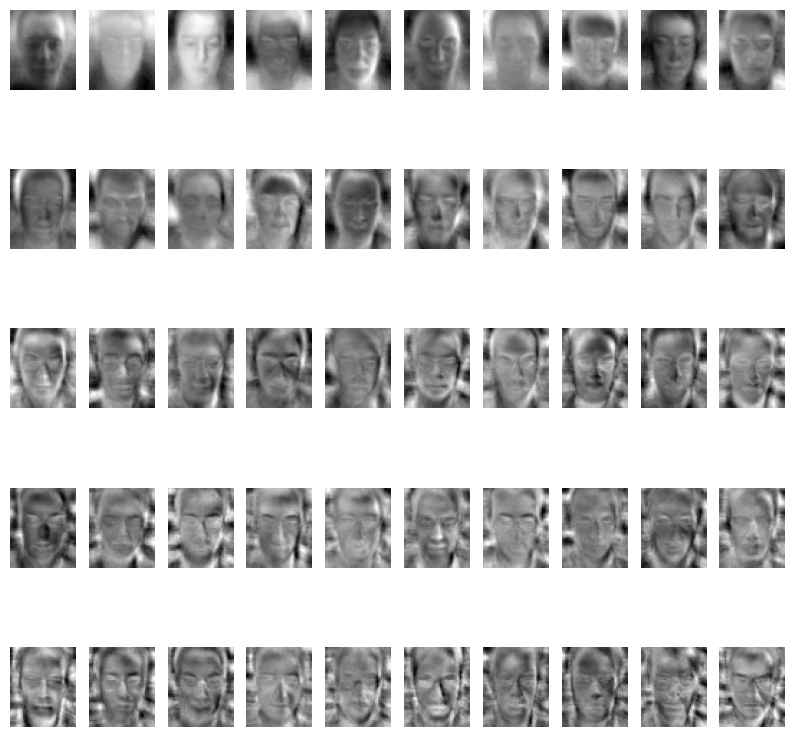

In [ ]:
#plot the top 50 principal components from matrix_U
fig = plt.figure(figsize=(10, 10))
for i in range(50):
    fig.add_subplot(5, 10, i + 1)
    plt.imshow(np.reshape(matrix_U[:, i], (46, 56)).T, cmap='gist_gray')
    plt.axis('off')
plt.show()

In [ ]:
#function for projecting image
def project_image(image, U, k):
    return np.dot(image.T, U[:, :k])

#function for reconstructing image
def reconstruct_image(image, U, k):
    projected = project_image(image, U, k)
    return np.dot(projected, U[:, :k].T)

#function for calculating the mean squared error
def mse(imageA, imageB):
    return np.mean((imageA - imageB) ** 2)

#function for calculating the percetange error
def percentage_error(imageA, imageB):
    return np.mean(np.abs(imageA - imageB) / np.abs(imageA)) * 100

#function for plotting the original image, and the reconstructed images with M = 10, 50, 100, 200, 415
def plot_reconstructed_images(image, U):
    fig = plt.figure(figsize=(10, 10))
    fig.add_subplot(1, 6, 1)
    plt.imshow(np.reshape(image, (46, 56)).T, cmap='gist_gray')
    plt.title('Original')
    plt.axis('off')
    for i, k in enumerate([9, 49, 99, 199, 414]):
        reconstructed = reconstruct_image(image, U, k)
        fig.add_subplot(1, 6, i + 2)
        plt.imshow(np.reshape(reconstructed, (46, 56)).T, cmap='gist_gray')
        plt.axis('off')
        plt.title('M = ' + str(k + 1))
        print('MSE for M = ', k + 1, ': ', mse(image, reconstructed))
        print('Percentage error for M = ', k, ': ', percentage_error(image, reconstructed).round(2), '%')
    plt.show()

MSE for M =  10 :  1164.573096716592
Percentage error for M =  9 :  37.66 %
MSE for M =  50 :  424.8474369228482
Percentage error for M =  49 :  22.8 %
MSE for M =  100 :  194.45354981797283
Percentage error for M =  99 :  16.52 %
MSE for M =  200 :  42.79047980912801
Percentage error for M =  199 :  8.3 %
MSE for M =  415 :  14.579131991507433
Percentage error for M =  414 :  5.02 %


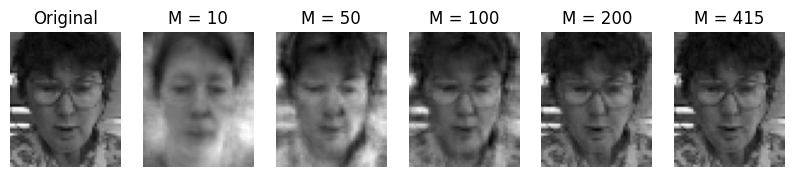

In [ ]:
#plot reconstruct image of the first image in the training set
plot_reconstructed_images(train_set[:, 0], matrix_U)

MSE for M =  10 :  803.3135424972246
Percentage error for M =  9 :  30.81 %
MSE for M =  50 :  382.8234286888037
Percentage error for M =  49 :  21.63 %
MSE for M =  100 :  179.44650700741977
Percentage error for M =  99 :  14.95 %
MSE for M =  200 :  58.22943176328008
Percentage error for M =  199 :  8.52 %
MSE for M =  415 :  15.337147299848308
Percentage error for M =  414 :  4.51 %


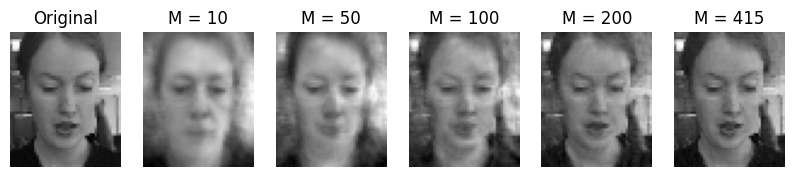

In [ ]:
#plot reconstruct image of the ninth image in the training set
plot_reconstructed_images(train_set[:, 8], matrix_U)

MSE for M =  10 :  1054.436038618684
Percentage error for M =  9 :  36.94 %
MSE for M =  50 :  467.9544388694574
Percentage error for M =  49 :  21.29 %
MSE for M =  100 :  335.8922214161852
Percentage error for M =  99 :  17.31 %
MSE for M =  200 :  240.89695024429582
Percentage error for M =  199 :  15.44 %
MSE for M =  415 :  163.59661769314522
Percentage error for M =  414 :  13.07 %


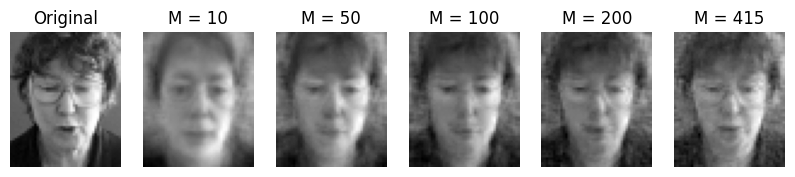

In [ ]:
#plot the reconstruct image of the first image in the testing set
plot_reconstructed_images(test_set[:, 0], matrix_U)

MSE for M =  10 :  1168.6462824561795
Percentage error for M =  9 :  39.72 %
MSE for M =  50 :  356.5884632677005
Percentage error for M =  49 :  19.94 %
MSE for M =  100 :  231.507263930511
Percentage error for M =  99 :  16.32 %
MSE for M =  200 :  147.86363999225253
Percentage error for M =  199 :  13.17 %
MSE for M =  415 :  103.52124560211514
Percentage error for M =  414 :  11.21 %


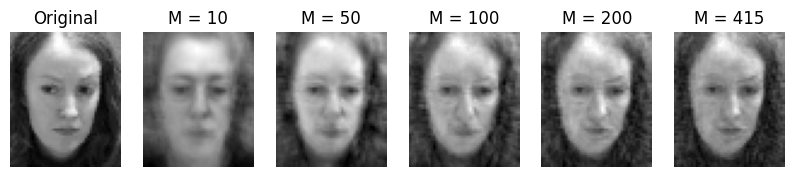

In [ ]:
#plot the reconstruct image of the third image in the testing set
plot_reconstructed_images(test_set[:, 2], matrix_U)

In [ ]:
#function for image recognition
def image_recognition(image, U, k, train_set, train_labels):
    projected = project_image(image, U, k)
    min_dist = np.inf
    min_index = 0
    for i in range(train_set.shape[1]):
        dist = np.linalg.norm(projected - project_image(train_set[:, i], U, k))
        if dist < min_dist:
            min_dist = dist
            min_index = i
    return train_labels[min_index]

#function for calculating the accuracy
def accuracy(test_set, test_labels, U, k, train_set, train_labels):
    correct = 0
    for i in range(test_set.shape[1]):
        if image_recognition(test_set[:, i], U, k, train_set, train_labels) == test_labels[i]:
            correct += 1
    return correct / test_set.shape[1] * 100

#calculate the accuracy for M = 10, 50, 100, 200, 415 and time, memory for each M
def accuracy_time_memory(train_set, train_labels, test_set, test_labels, U):
    for i, k in enumerate([10, 50, 100, 200]):
        start_time = time.time()
        accuracy_ = accuracy(test_set, test_labels, U, k, train_set, train_labels)
        end_time = time.time()
        print('Accuracy for M = ', k, ': ', round(accuracy_,2), '%')
        print('Time for M = ', k, ': ', round(end_time - start_time, 3), ' seconds')
        reduced_U_memory = U[:, :k].nbytes
        train_set_memory = train_set.nbytes
        test_set_memory = test_set.nbytes
        total_memory_bytes = reduced_U_memory + train_set_memory + test_set_memory
        total_memory_kilobytes = total_memory_bytes / 1024
        print('Memory for M = ', k + 1, ': ', total_memory_kilobytes, ' KB')
        print('---------------------------------------------------------------')

#function for confusion matrix
def confusion_matrix_(test_set, test_labels, U, k, train_set, train_labels):
    y_pred = []
    for i in range(test_set.shape[1]):
        y_pred.append(image_recognition(test_set[:, i], U, k, train_set, train_labels))
    return confusion_matrix(test_labels, y_pred)

In [ ]:
#calculate the accuracy for M = 10, 50, 100, 200, 415 and time, memory for each M
accuracy_time_memory(train_set, train_labels, test_set, test_labels, matrix_U)

Accuracy for M =  9 :  34.62 %
Time for M =  9 :  4.751  seconds
Memory for M =  10 :  1489.25  KB
---------------------------------------------------------------
Accuracy for M =  49 :  59.62 %
Time for M =  49 :  12.082  seconds
Memory for M =  50 :  2294.25  KB
---------------------------------------------------------------
Accuracy for M =  99 :  62.5 %
Time for M =  99 :  19.781  seconds
Memory for M =  100 :  3300.5  KB
---------------------------------------------------------------
Accuracy for M =  199 :  63.46 %
Time for M =  199 :  37.486  seconds
Memory for M =  200 :  5313.0  KB
---------------------------------------------------------------


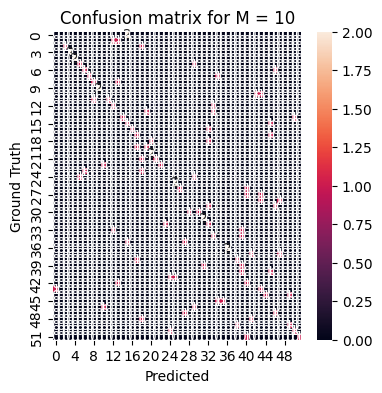

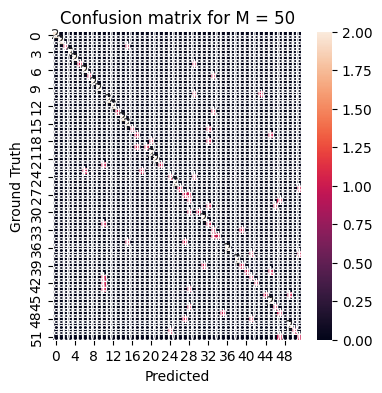

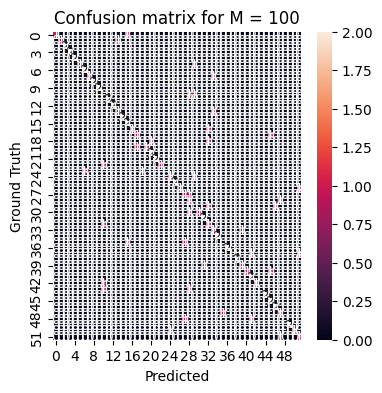

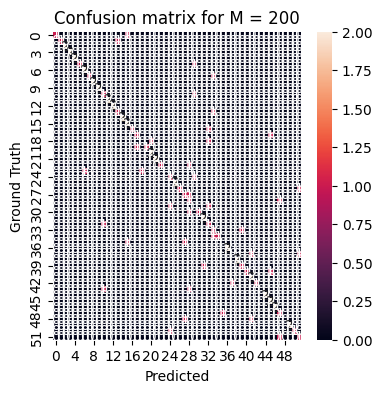

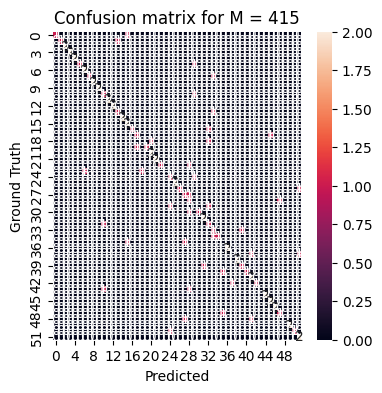

In [ ]:
#plot the confusion matrix for M = 10, 50, 100, 200, 415
for i, k in enumerate([10, 50, 100, 200, 415]):
    plt.figure(figsize=(4, 4))
    sns.heatmap(confusion_matrix_(test_set, test_labels, matrix_U, k, train_set, train_labels), annot=True, fmt='g')
    plt.title('Confusion matrix for M = ' + str(k))
    plt.xlabel('Predicted')
    plt.ylabel('Ground Truth')
    plt.show()

In [ ]:
#plot recognition along with the original image from the testing set for a succesful and an unsuccesful prediction
def plot_recognition(U, k, train_set, train_labels, test_set, test_labels):
    success = False
    failure = False
    for i, image in enumerate(test_set.T):
        predicted = image_recognition(image, U, k, train_set, train_labels)
        original = test_labels[i]
        if predicted == original and not success:
            success = True
            #subplot original image and the predicted image
            fig = plt.figure(figsize=(4, 4))
            fig.add_subplot(1, 2, 1)
            plt.imshow(np.reshape(image, (46, 56)).T, cmap='gist_gray')
            plt.title('Original')
            plt.axis('off')
            fig.add_subplot(1, 2, 2)
            predicted_image_index = test_labels.index(predicted)
            predicted_image = np.reshape(test_set[:, predicted_image_index + 1], (46, 56)).T
            plt.imshow(predicted_image, cmap = 'gist_gray')
            plt.title(f"Correct Pred")
            plt.axis('off')
            plt.show()

        if predicted != original and not failure:
            if i <5: failure = True
            fig = plt.figure(figsize=(4, 4))
            fig.add_subplot(1, 2, 1)
            plt.imshow(np.reshape(image, (46, 56)).T, cmap='gist_gray')
            plt.title('Original')
            plt.axis('off')
            fig.add_subplot(1, 2, 2)
            predicted_image_index = test_labels.index(predicted)
            predicted_image = np.reshape(test_set[:, predicted_image_index], (46, 56)).T
            plt.imshow(predicted_image, cmap = 'gist_gray')
            plt.title(f"Wrong Pred")
            plt.axis('off')
            plt.show()

        if success and failure:
            break

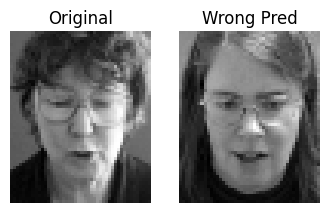

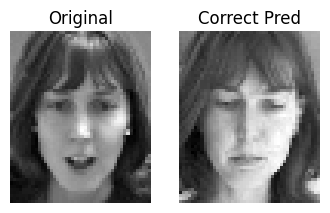

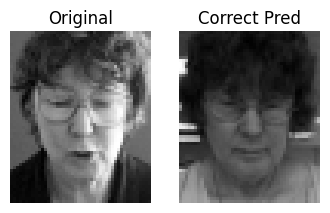

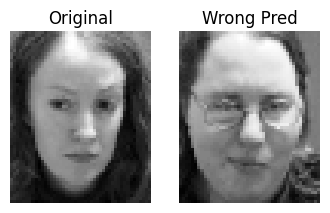

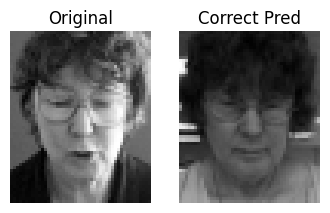

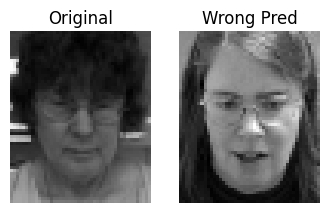

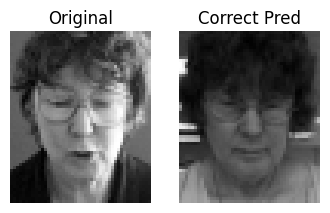

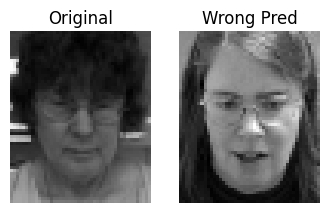

In [ ]:
#plot recognition for M = 10, 50, 100, 200, 415
M = [9, 49, 99, 199]
for k in M:
    plot_recognition(matrix_U, k, train_set, train_labels, test_set, test_labels)

Q3 (Done before ensemble)

In [ ]:
#perform LDA on training set
#calculate the mean of each class
mean_class = []
for i in range(num_individuals):
    mean_class.append(np.mean(train_set[:, i * 8 : (i + 1) * 8], axis=1))

#calculate the mean of the whole training set
mean_train_set = np.mean(train_set, axis=1)

#calculate the between-class scatter matrix
S_B = np.zeros((2576, 2576))
for i in range(num_individuals):
    S_B += 8 * np.outer((mean_class[i] - mean_train_set), (mean_class[i] - mean_train_set))

#calculate the within-class scatter matrix
S_W = np.zeros((2576, 2576))

for i in range(num_individuals):
    for j in range(8):
        S_W += np.outer((train_set[:, i * 8 + j] - mean_class[i]), (train_set[:, i * 8 + j] - mean_class[i]))

print('rank of S_B: ', np.linalg.matrix_rank(S_B))
print('rank of S_W: ', np.linalg.matrix_rank(S_W))


rank of S_B:  51
rank of S_W:  364


In [ ]:
#Get W_pca with chosing vectors with the largest eigenvalues
W_pca = matrix_U[:, :200]
print('W_pca shape: ', W_pca.shape)

W_pca shape:  (2576, 200)


In [ ]:
#Calculate W_lda
W_pca_T_S_B_W_pca = W_pca.T.dot(S_B).dot(W_pca)
W_pca_T_S_W_W_pca = W_pca.T.dot(S_W).dot(W_pca)
W_lda = np.linalg.inv(W_pca_T_S_W_W_pca).dot(W_pca_T_S_B_W_pca)

#calculate the eigenvalues and eigenvectors of W_lda
lda_eig_val, lda_eig_vec = np.linalg.eig(W_lda)

print('lda_eig_val shape: ', lda_eig_val.shape)
print('lda_eig_vec shape: ', lda_eig_vec.shape)

lda_eig_val shape:  (200,)
lda_eig_vec shape:  (200, 200)


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


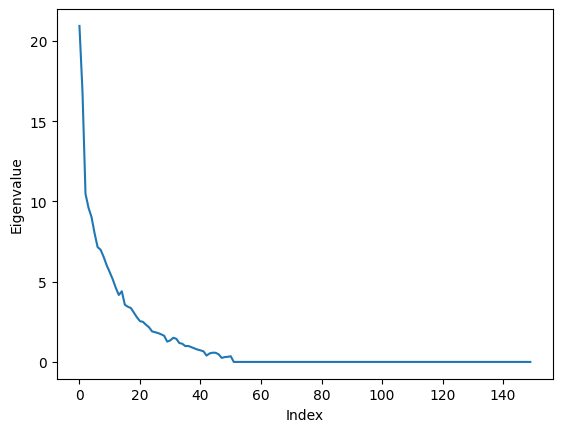

In [ ]:
#plot the eigenvalues of W_lda
plt.plot(lda_eig_val)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.show()


In [ ]:
#face recognition using LDA
#function for projecting image
def project_image_lda(image, W_lda, W_pca, k):
    return np.dot(np.dot(image.T, W_pca), W_lda[:, :k])

#function for image recognition
def image_recognition_lda(image, W_lda, W_pca, k, train_set, train_labels):
    projected = project_image_lda(image, W_lda, W_pca, k)
    min_dist = np.inf
    min_index = 0
    for i in range(train_set.shape[1]):
        dist = np.linalg.norm(projected - project_image_lda(train_set[:, i], W_lda, W_pca, k))
        if dist < min_dist:
            min_dist = dist
            min_index = i
    return train_labels[min_index]

#function for calculating the accuracy
def accuracy_lda(test_set, test_labels, W_lda, W_pca, k, train_set, train_labels):
    correct = 0
    for i in range(test_set.shape[1]):
        if image_recognition_lda(test_set[:, i], W_lda, W_pca, k, train_set, train_labels) == test_labels[i]:
            correct += 1
    return correct / test_set.shape[1] * 100

#function for calculating the accuracy, time and memory
def accuracy_time_memory_lda(train_set, train_labels, test_set, test_labels, W_lda, W_pca, k):
    start_time = time.time()
    accuracy_ = accuracy_lda(test_set, test_labels, W_lda, W_pca, k, train_set, train_labels)
    end_time = time.time()
    print('Accuracy for M = ', k, ': ', accuracy_, '%')
    print('Time for M = ', k, ': ', round(end_time - start_time, 3), ' seconds')
    print('Memory for M = ', k, ': ', (W_lda[:, :k].nbytes + W_pca[:, :k].nbytes) / 1024, ' KB')
    print('---------------------------------------------------------------')

In [ ]:
#acurracy, time and memory
for M in [48, 50, 55, 60]:
  accuracy_time_memory_lda(train_set, train_labels, test_set, test_labels, lda_eig_vec, W_pca, M)

Accuracy for M =  48 :  85.57692307692307 %
Time for M =  48 :  43.657  seconds
Memory for M =  48 :  1119.75  KB
---------------------------------------------------------------
Accuracy for M =  50 :  85.57692307692307 %
Time for M =  50 :  37.434  seconds
Memory for M =  50 :  1166.40625  KB
---------------------------------------------------------------
Accuracy for M =  55 :  86.53846153846155 %
Time for M =  55 :  37.077  seconds
Memory for M =  55 :  1283.046875  KB
---------------------------------------------------------------
Accuracy for M =  60 :  82.6923076923077 %
Time for M =  60 :  36.547  seconds
Memory for M =  60 :  1399.6875  KB
---------------------------------------------------------------


In [ ]:
#confusion matrix for LDA
def confusion_matrix_lda(test_set, test_labels, W_lda, W_pca, k, train_set, train_labels):
    y_pred = []
    for i in range(test_set.shape[1]):
        y_pred.append(image_recognition_lda(test_set[:, i], W_lda, W_pca, k, train_set, train_labels))
    return confusion_matrix(test_labels, y_pred)

##plot recognition along with the original image from the testing set for a succesful and an unsuccesful prediction for LDA
def plot_recognition_LDA(W_lda, W_pca, k, train_set, train_labels, test_set, test_labels):
    success = False
    failure = False
    for i, image in enumerate(test_set.T):
        predicted = image_recognition_lda(image, W_lda, W_pca, k, train_set, train_labels)
        original = test_labels[i]
        if predicted == original and not success:
            success = True
            #subplot original image and the reconstructed image
            fig = plt.figure(figsize=(4, 4))
            fig.add_subplot(1, 2, 1)
            plt.imshow(np.reshape(image, (46, 56)).T, cmap='gist_gray')
            plt.title('Original')
            plt.axis('off')
            fig.add_subplot(1, 2, 2)
            predicted_image_index = test_labels.index(predicted)
            predicted_image = np.reshape(train_set[:, predicted_image_index + 1], (46, 56)).T
            plt.imshow(predicted_image, cmap = 'gist_gray')
            plt.title(f"Correct Pred.")
            plt.axis('off')
            plt.show()

        if predicted != original and not failure:
            failure = True
            #subplot original image and the reconstructed image
            fig = plt.figure(figsize=(4, 4))
            fig.add_subplot(1, 2, 1)
            plt.imshow(np.reshape(image, (46, 56)).T, cmap='gist_gray')
            plt.title('Original')
            plt.axis('off')
            fig.add_subplot(1, 2, 2)
            predicted_image_index = test_labels.index(predicted)
            predicted_image = np.reshape(test_set[:, predicted_image_index], (46, 56)).T
            plt.imshow(predicted_image, cmap = 'gist_gray')
            plt.title(f"Wrong Pred.")
            plt.axis('off')
            plt.show()

        if success and failure:
            break

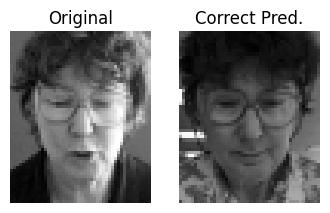

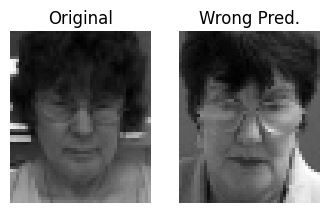

In [ ]:
#plot recognition for LDA
plot_recognition_LDA(lda_eig_vec, W_pca, 50, train_set, train_labels, test_set, test_labels)

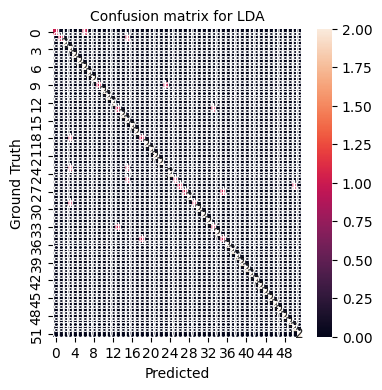

In [ ]:
#plot the confusion matrix for LDA
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix_lda(test_set, test_labels, lda_eig_vec, W_pca, 50, train_set, train_labels), annot=True, fmt='g')
plt.title('Confusion matrix for LDA', fontsize=10)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Ground Truth', fontsize = 10)
plt.show()

**Q3 PCA-LDA Ensemble**
- randomisation in feature space
- randomisation on data samples (i.e. bagging)
- the number of base models, the randomness parameter,
- the error of the committee machine vs the average error of individual models
- fusion rules
- recognition accuracy and confusion matrix

vanilla PCA-LDA classifier

best with **M_PCA(167) M_LDA(47)** 0.9038461538461539

-> M_PCA(150 ~ 200), M_LDA(20~50) is valid from experiment

In [ ]:
v_acc = np.load('./vanilla_accuracy_array_3d.npy')

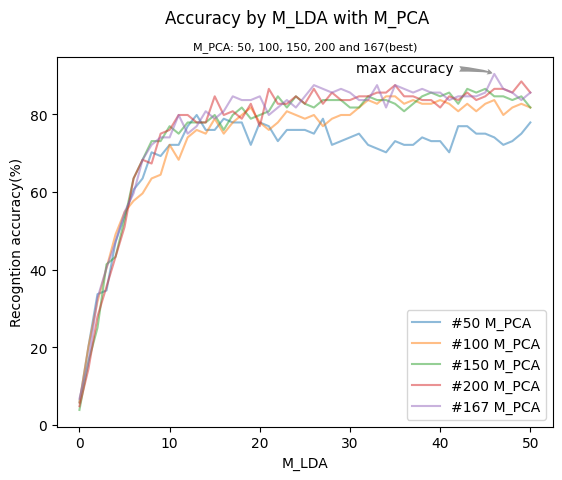

In [ ]:
# plt.figure(figsize=(10,5))

plt.plot(range(len(v_acc[50,:])), v_acc[50,:]*100, alpha=0.5, label='#50 M_PCA')
plt.plot(range(len(v_acc[100,:])), v_acc[100,:]*100, alpha=0.5, label='#100 M_PCA')
plt.plot(range(len(v_acc[150,:])), v_acc[150,:]*100, alpha=0.5, label='#150 M_PCA')
plt.plot(range(len(v_acc[200,:])), v_acc[200,:]*100, alpha=0.5, label='#200 M_PCA')
plt.plot(range(len(v_acc[166,:])), v_acc[166,:]*100, alpha=0.5, label='#167 M_PCA')
plt.xlabel("M_LDA")
plt.ylabel("Recogntion accuracy(%)")
plt.suptitle('Accuracy by M_LDA with M_PCA')
plt.title('M_PCA: 50, 100, 150, 200 and 167(best)', fontsize=8)
plt.annotate('max accuracy',
            xy=(46, 90), xycoords='data',
            xytext=(0.80, 0.99), textcoords='axes fraction',
            # arrowprops=dict(facecolor='none', shrink=0.05),
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"),
            horizontalalignment='right', verticalalignment='top')
plt.legend()
plt.savefig('pca_lda_acc.png')

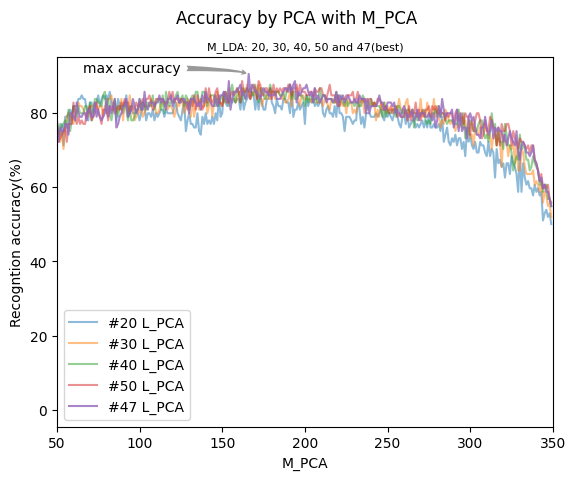

In [ ]:
# plt.figure(figsize=(8,4))

plt.plot(range(len(v_acc[:350,20])), v_acc[:350,20]*100, alpha=0.5, label='#20 L_PCA')
plt.plot(range(len(v_acc[:350,30])), v_acc[:350,30]*100, alpha=0.5, label='#30 L_PCA')
plt.plot(range(len(v_acc[:350,40])), v_acc[:350,40]*100, alpha=0.5, label='#40 L_PCA')
plt.plot(range(len(v_acc[:350,50])), v_acc[:350,50]*100, alpha=0.5, label='#50 L_PCA')
plt.plot(range(len(v_acc[:350,46])), v_acc[:350,46]*100,  alpha=0.8, label='#47 L_PCA')
# plt.annotate('max', xy=(166,46), xytext=(166,46), arrowprops=dict(facecolor='black', headwidth=4, width=2,
#                               headlength=4),
#                horizontalalignment='left', verticalalignment='top')
plt.annotate('max accuracy',
            xy=(166, 90), xycoords='data',
            xytext=(0.25, 0.99), textcoords='axes fraction',
            # arrowprops=dict(facecolor='none', shrink=0.05),
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            # patchB=el,
                            connectionstyle="angle3,angleA=0,angleB=-90"),
            horizontalalignment='right', verticalalignment='top')
plt.xlim(50, 350)
plt.xlabel("M_PCA")
plt.ylabel("Recogntion accuracy(%)")
plt.suptitle('Accuracy by PCA with M_PCA')
plt.title('M_LDA: 20, 30, 40, 50 and 47(best)', fontsize=8)
plt.legend()
plt.savefig('ensemble_append.png')

**Ensemble**
- bagging
- accuracy vs num of models
- accuracy vs randomness parameter **ρ**
- accuracy vs E_com and E_avg

-> Best 0.9038461538461539 with ρ(0.95)  in 50 base models by the experiments below

**ρ** is random subsets of the total train image dataset. The higher, the more correlated as a model has more similar samples


**#of base model** is valid over 30 with randomness parameter, ρ starts from 0.7

E_com has 1/T x E_avg shown in plot


In [ ]:
emsemble_acc = np.load('emsemble_acc.npy')
print(f'emsemble_acc: {len(emsemble_acc)}')
individual_acc = np.load('individual_acc.npy')
print(f'individual_acc: {len(individual_acc)}')

emsemble_acc: 300
individual_acc: 300


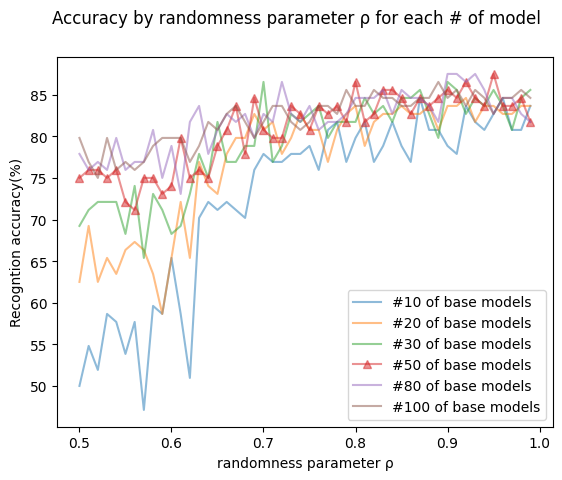

In [ ]:
# plt.figure(figsize=(10,5))
x = np.arange(0.50, 1.00, 0.01)
plt.plot(x, emsemble_acc[:50]*100, alpha=0.5, label='#10 of base models')
plt.plot(x, emsemble_acc[50:100]*100,  alpha=0.5, label='#20 of base models')
plt.plot(x, emsemble_acc[100:150]*100,  alpha=0.5, label='#30 of base models')
plt.plot(x, emsemble_acc[150:200]*100,  '^-', alpha=0.5, label='#50 of base models')
plt.plot(x, emsemble_acc[200:250]*100, alpha=0.5, label='#80 of base models')
plt.plot(x, emsemble_acc[250:300]*100, alpha=0.5, label='#100 of base models')
plt.xlabel("randomness parameter ρ")
plt.ylabel("Recogntion accuracy(%)")
plt.suptitle('Accuracy by randomness parameter ρ for each # of model')
# plt.title('each models accuracy in ensemble and individual learning', fontsize=8)
plt.legend()
plt.savefig('./ensemble_acc.png')

In [ ]:
plt.savefig('./ensemble_acc.png')

<Figure size 640x480 with 0 Axes>

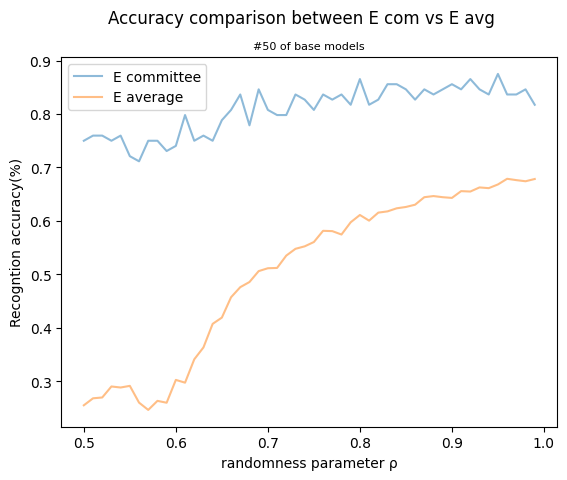

In [ ]:
# plt.figure(figsize=(10,5))
x = np.arange(0.5, 1, 0.01)

plt.plot(x, emsemble_acc[150:200]*100, alpha=0.5, label='E committee')
plt.plot(x, individual_acc[150:200]&100, alpha=0.5, label='E average')
plt.xlabel("randomness parameter ρ")
plt.ylabel("Recogntion accuracy(%)")
plt.suptitle('Accuracy comparison between E com vs E avg')
plt.title('#50 of base models', fontsize=8)
plt.legend()

- randomisation in feature space
parameter M0, M1

max accuracy : 0.9326923076923077 with M0 = 60, M1 = 111 by experiments

high values for M1 dorps accuracy rapidly

In [ ]:
r_f = np.load('accuracies_randomfeature.npy', allow_pickle=True)
m_50=[]
for a in r_f[:32,1]:
    m_50.append(a[1])
m_80=[]
for a in r_f[90:116,1]:
    m_80.append(a[1])
m_100=[]
for a in r_f[140:162,1]:
    m_100.append(a[1])
m_130=[]
for a in r_f[200:216,1]:
    m_130.append(a[1])
m_150=[]
for a in r_f[230:242,1]:
    m_150.append(a[1])
m_180=[]
for a in r_f[261:266,1]:
    m_180.append(a[1])
m_200=[]
for a in r_f[270:272,1]:
    m_200.append(a[1])

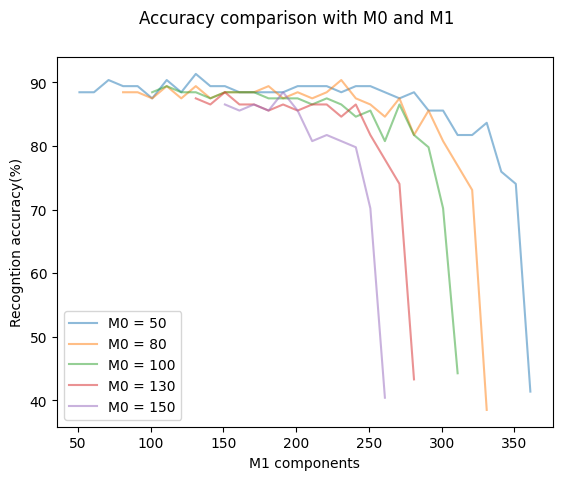

In [ ]:
x = np.arange(50, 200)

plt.plot( m_50, r_f[:32,0]*100, alpha=0.5, label='M0 = 50')
plt.plot( m_80, r_f[90:116,0]*100, alpha=0.5, label='M0 = 80')
plt.plot( m_100, r_f[140:162,0]*100, alpha=0.5, label='M0 = 100')
plt.plot( m_130, r_f[200:216,0]*100, alpha=0.5, label='M0 = 130')
plt.plot( m_150, r_f[230:242,0]*100, alpha=0.5, label='M0 = 150')
plt.xlabel("M1 components")
plt.ylabel("Recogntion accuracy(%)")
plt.suptitle('Accuracy comparison with M0 and M1')
plt.legend()

- bagging algorithm

max accuracy : **0.8846153846153846** with M_PCA M_LDA**(136, 30)**
CPU times: user 4h 26min 20s, sys: 3h 11min 5s, total: 7h 37min 25s

uniform distribution, 63.2% of unique data

In [ ]:
bagging_list=[]
for i in range(50):
  bagging_list.append( bagging(  X_train.shape[0], int(X_train.shape[0] * 0.95)))

Text(0.5, 1.0, 'Sample indices in bagging list')

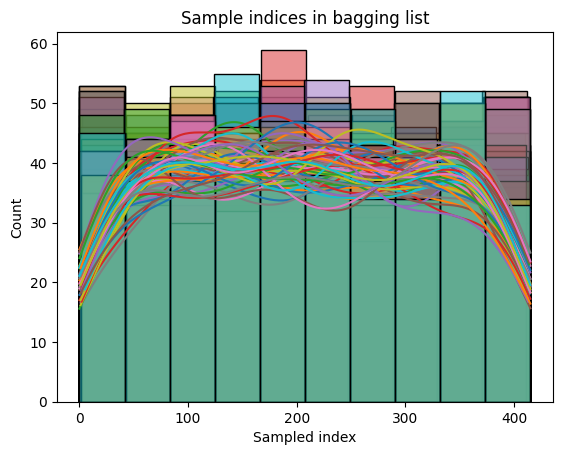

In [ ]:
for b in bagging_list:
    # plt.hist(b, density=False, alpha=0.5)
    sns.histplot(b, kde=True)
plt.ylabel('Count')
plt.xlabel('Sampled index');
plt.title('Sample indices in bagging list')

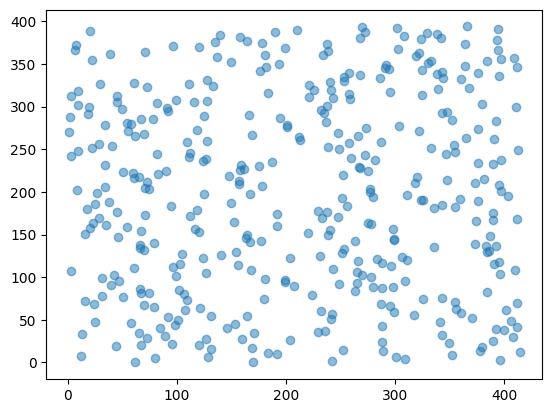

In [ ]:
plt.scatter(bagging_list[0], range(len(bagging_list[0])), marker='o', alpha=0.5)
plt.show()

- fusion rule

adopt majority voting algorithm as NN classifier outputs only the labels

- accuracy and confusion matrix

- code

In [ ]:
def bagging(r, n):
    return np.random.choice(r, n, replace=True)
def feature_sampling(s, n):
    return np.random.choice(s, n, replace=False)
## Bagging (Bootstrap AGGregatiNG) - randomizing training set
# default (M_pca=147, M_lda=47, n_base_models=5, randomness_rho=0.95)
# Individual Model Accuracies:
# Model 1: 0.64
# Model 2: 0.65
# Model 3: 0.60
# Model 4: 0.62
# Model 5: 0.59
# Individual accuracy mean: 0.62 E_av: 0.38
# Ensemble Accuracy: 0.74, E_comm: 0.26
def run_bagging(M_pca, M_lda, n_base_models, randomness_rho):
    individual_accuracies = []
    ensemble_predictions = []
    n_samples = X_train.shape[0]
    n_sub_samples = int(n_samples * randomness_rho) #416

    base_model = make_pipeline( PCA(n_components=M_pca),
                                LinearDiscriminantAnalysis(n_components=M_lda),
                                KNeighborsClassifier(n_neighbors=1) )

    first_PCA = PCA(n_components=(n_samples-1))
    X_train_pca = first_PCA.fit_transform(X_train)
    X_test_pca = first_PCA.transform(X_test)
    for i in range(n_base_models) :
        random_indices = bagging(n_samples, n_sub_samples)
        X_random_train = X_train_pca[random_indices, :]
        y_random_train = y_train[random_indices]

        pipeline = clone(base_model)
        pipeline.fit(X_random_train, y_random_train)
        y_pred = pipeline.predict(X_test_pca)

        individual_accuracies.append(accuracy_score(test_labels, y_pred))
        ensemble_predictions.append(y_pred)

    ensemble_predictions = np.array(ensemble_predictions)
    ensemble_mean_predicts = np.round(np.mean(ensemble_predictions, axis=0))
    ensemble_predictions = ensemble_predictions.T
    ensemble_predictions = [np.argmax(np.bincount(e_pred)) for e_pred in ensemble_predictions]

    ensemble_accuracy = accuracy_score(test_labels, ensemble_predictions)
    individual_mean_accuracy = np.mean(individual_accuracies)
    # print("Individual Model Accuracies:")
    # for i, accuracy in enumerate(individual_accuracies):
    #     print(f"Model {i + 1}: {accuracy:.2f}")
    # print(f'Individual accuracy mean: {individual_mean_accuracy:.2f} E_av: {1-individual_mean_accuracy:.2f} ')
    # print(f"Ensemble Accuracy: {ensemble_accuracy:.2f}, E_comm: {1-ensemble_accuracy:.2f}")
    return ensemble_accuracy, individual_mean_accuracy

# M_pca=147, M_lda=47, n_base_models=5, m0 = 100, m1 = 111
# Individual Model Accuracies:
# Model 1: 0.84
# Model 2: 0.81
# Model 3: 0.85
# Model 4: 0.86
# Model 5: 0.82
# Individual accuracy mean: 0.83 E_av: 0.17
# Ensemble Accuracy: 0.85, E_comm: 0.15
def randomize_in_feature_space(M_pca, M_lda, n_base_models, m0, m1):
    individual_accuracies = []
    ensemble_predictions = []
    n_samples = X_train.shape[0]

    base_model = make_pipeline(LinearDiscriminantAnalysis(n_components=M_lda),
                            KNeighborsClassifier(n_neighbors=1) )

    first_PCA = PCA(n_components=(n_samples-1))
    X_train_pca = first_PCA.fit_transform(X_train)
    X_test_pca = first_PCA.transform(X_test)

    for i in range(n_base_models) :
        M0 = np.arange(m0)
        M1 = feature_sampling(np.arange(m0, n_samples-1), m1)
        subspace = np.concatenate((M0, M1))

        X_train_subset = X_train_pca[:, subspace]
        y_train_subset = y_train

        pipeline = clone(base_model)
        pipeline.fit(X_train_subset, y_train_subset.T)
        y_pred = pipeline.predict(X_test_pca[:,subspace])

        individual_accuracies.append(accuracy_score(test_labels, y_pred))
        ensemble_predictions.append(y_pred)

    ensemble_predictions = np.array(ensemble_predictions)
    ensemble_mean_predicts = np.round(np.mean(ensemble_predictions, axis=0))
    ensemble_predictions = ensemble_predictions.T
    ensemble_predictions = [np.argmax(np.bincount(e_pred)) for e_pred in ensemble_predictions]

    ensemble_accuracy = accuracy_score(test_labels, ensemble_predictions)
    individual_mean_accuracy = np.mean(individual_accuracies)
    # print("Individual Model Accuracies:")
    # for i, accuracy in enumerate(individual_accuracies):
    #     print(f"Model {i + 1}: {accuracy:.2f}")
    # print(f'Individual accuracy mean: {individual_mean_accuracy:.2f} E_av: {1-individual_mean_accuracy:.2f} ')
    # print(f"Ensemble Accuracy: {ensemble_accuracy:.2f}, E_comm: {1-ensemble_accuracy:.2f}")
    return ensemble_accuracy, individual_mean_accuracy, ensemble_predictions

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = (train_set.T, test_set.T, np.array(train_labels).T, np.array(test_labels).T)
num_classes = 52
num_samples = X_train.shape[0]
limit_S_B = num_classes - 1 # M_lda
limit_S_W = num_samples - num_classes  # M_pca

In [ ]:
M_pca=167
M_lda=47
m = 50
ratio = 0.95

run_bagging(M_pca, M_lda, m, ratio)

(0.8269230769230769, 0.6065384615384616)

In [ ]:
acc, _, y_pred =randomize_in_feature_space(M_pca, M_lda, m, 60, 111)

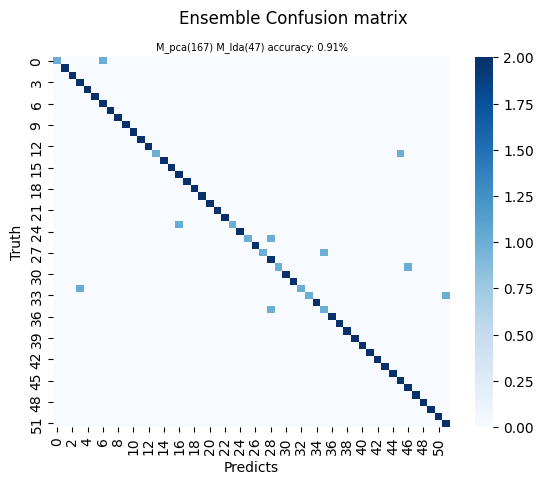

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap="Blues")
plt.xlabel('Predicts')
plt.ylabel('Truth')
plt.suptitle(f'Ensemble Confusion matrix')
plt.title(f'M_pca({M_pca}) M_lda({M_lda}) accuracy: {acc:.2f}%', fontsize=7)
plt.show()

Q5

In [ ]:
#train the random forest classifier for a given number of trees
def train_random_forest_classifier_numtrees(n_estimators, train_set, train_labels):
    start_time = time.time()
    clf = RandomForestClassifier(n_estimators=n_estimators, criterion = 'entropy', min_samples_leaf=2, random_state=42)
    clf.fit(train_set.T, train_labels)
    end_time = time.time()
    return clf, end_time - start_time

#train the random forest classifier for a given max_depth
def train_random_forest_classifier_max_depth(max_depth, train_set, train_labels):
    start_time = time.time()
    clf = RandomForestClassifier(n_estimators = 50, max_depth=max_depth, criterion = 'entropy', min_samples_leaf=2, random_state=42)
    clf.fit(train_set.T, train_labels)
    end_time = time.time()
    return clf, end_time - start_time

#train the random forest classifier for a given min_samples_split
def train_random_forest_classifier_min_samples_split(min_samples_split, train_set, train_labels):
    start_time = time.time()
    clf = RandomForestClassifier(min_samples_split=min_samples_split, criterion = 'entropy', min_samples_leaf=2, random_state=42)
    clf.fit(train_set.T, train_labels)
    end_time = time.time()
    return clf, end_time - start_time

#train the random forest classifier for a max_features
def train_random_forest_classifier_max_features(max_features, train_set, train_labels):
    start_time = time.time()
    clf = RandomForestClassifier(max_features=max_features, criterion = 'entropy', min_samples_leaf=2, random_state=42)
    clf.fit(train_set.T, train_labels)
    end_time = time.time()
    return clf, end_time - start_time


In [ ]:
#train the random forest classifier for a given number of trees
#and plot the accuracy vs number of trees and time vs number of trees
def train_random_forest_classifier_numtrees_plot(n_estimators, train_set, train_labels, test_set, test_labels):
    accuracy_ = []
    time_ = []
    time_for_test = []
    #find time for each number of trees
    for n in n_estimators:
        clf, time_taken = train_random_forest_classifier_numtrees(n, train_set, train_labels)
        start_time = time.time()
        accuracy_.append(clf.score(test_set.T, test_labels))
        end_time = time.time()
        time_for_test.append(end_time - start_time)
        time_.append(time_taken)
    #subplot accuracy vs number of trees
    fig = plt.figure(figsize=(10, 5))
    fig.add_subplot(1, 2, 1)
    plt.plot(n_estimators, accuracy_, color = 'red', label = 'test')
    plt.xlabel('Number of trees', fontsize=20)
    plt.ylabel('Accuracy', fontsize=20)
    plt.legend()
    #subplot time and time for test vs number of trees
    fig.add_subplot(1, 2, 2)
    plt.plot(n_estimators, time_, label='train')
    plt.plot(n_estimators, time_for_test, label='test')
    plt.xlabel('Number of trees', fontsize=20)
    plt.ylabel('Time', fontsize=20)
    plt.legend()

    plt.suptitle('RF Classifier Performance vs Number of Trees', fontsize=20)
    plt.show()



#train the random forest classifier for a given max_depth
#and plot the accuracy vs max_depth and time vs max_depth
def train_random_forest_classifier_max_depth_plot(max_depth, train_set, train_labels, test_set, test_labels):
    accuracy_ = []
    time_ = []
    time_for_test = []
    #find time for each max_depth
    for max_d in max_depth:
        clf, time_taken = train_random_forest_classifier_max_depth(max_d, train_set, train_labels)
        start_time = time.time()
        accuracy_.append(clf.score(test_set.T, test_labels))
        end_time = time.time()
        time_for_test.append(end_time - start_time)
        time_.append(time_taken)
    #subplot accuracy vs max_depth
    fig = plt.figure(figsize=(10, 5))
    fig.add_subplot(1, 2, 1)
    plt.plot(max_depth, accuracy_, color = 'red', label = 'test')
    plt.xlabel('Max depth', fontsize=20)
    plt.ylabel('Accuracy', fontsize=20)
    plt.legend()
    #subplot time and time for test vs max_depth
    fig.add_subplot(1, 2, 2)
    plt.plot(max_depth, time_, label='train')
    plt.plot(max_depth, time_for_test, label='test')
    plt.xlabel('Max depth', fontsize=20)
    plt.ylabel('Time', fontsize=20)
    plt.legend()
    plt.suptitle('RF Classifier Performance vs Maximum Depth', fontsize = 20)
    plt.show()

#train the random forest classifier for a given min_samples_split
#and plot the accuracy vs min_samples_split and time vs min_samples_split
def train_random_forest_classifier_min_samples_split_plot(min_samples_split, train_set, train_labels, test_set, test_labels):
    accuracy_ = []
    time_ = []
    time_for_test = []
    #find time for each min_samples_split
    for min_s in min_samples_split:
        clf, time_taken = train_random_forest_classifier_min_samples_split(min_s, train_set, train_labels)
        start_time = time.time()
        accuracy_.append(clf.score(test_set.T, test_labels))
        end_time = time.time()
        time_for_test.append(end_time - start_time)
        time_.append(time_taken)
    #subplot accuracy vs min_samples_split
    fig = plt.figure(figsize=(10, 5))
    fig.add_subplot(1, 2, 1)
    plt.plot(min_samples_split, accuracy_, color='red', label='test')
    plt.xlabel('Min samples split', fontsize=20)
    plt.ylabel('Accuracy', fontsize=20)
    #subplot time and time for test vs min_samples_split
    fig.add_subplot(1, 2, 2)
    plt.plot(min_samples_split, time_, label='train')
    plt.plot(min_samples_split, time_for_test, label='test')
    plt.xlabel('Min samples split', fontsize=20)
    plt.ylabel('Time', fontsize=20)
    plt.legend()
    plt.suptitle('RF Classifier Performance vs Min. Sample Split', fontsize = 20)
    plt.show()

#train the random forest classifier for a given max_features
#and plot the accuracy vs max_features and time vs max_features
def train_random_forest_classifier_max_features_plot(max_features, train_set, train_labels, test_set, test_labels):
    accuracy_ = []
    time_ = []
    time_for_test = []
    #find time for each max_features
    for max_f in max_features:
        clf, time_taken = train_random_forest_classifier_max_features(max_f, train_set, train_labels)
        start_time = time.time()
        accuracy_.append(clf.score(test_set.T, test_labels))
        end_time = time.time()
        time_for_test.append(end_time - start_time)
        time_.append(time_taken)
    #subplot accuracy vs max_features
    fig = plt.figure(figsize=(10, 5))
    fig.add_subplot(1, 2, 1)
    plt.plot(max_features, accuracy_, color='red', label='test')
    plt.xlabel('Max features', fontsize=20)
    plt.ylabel('Accuracy', fontsize=20)
    plt.legend()
    #subplot time and time for test vs max_features
    fig.add_subplot(1, 2, 2)
    plt.plot(max_features, time_, label='train')
    plt.plot(max_features, time_for_test, label='test')
    plt.xlabel('Max features', fontsize=20)
    plt.ylabel('Time', fontsize=20)
    plt.legend()
    plt.suptitle('RF Classifier Performance vs Max Features', fontsize = 20)
    plt.show()


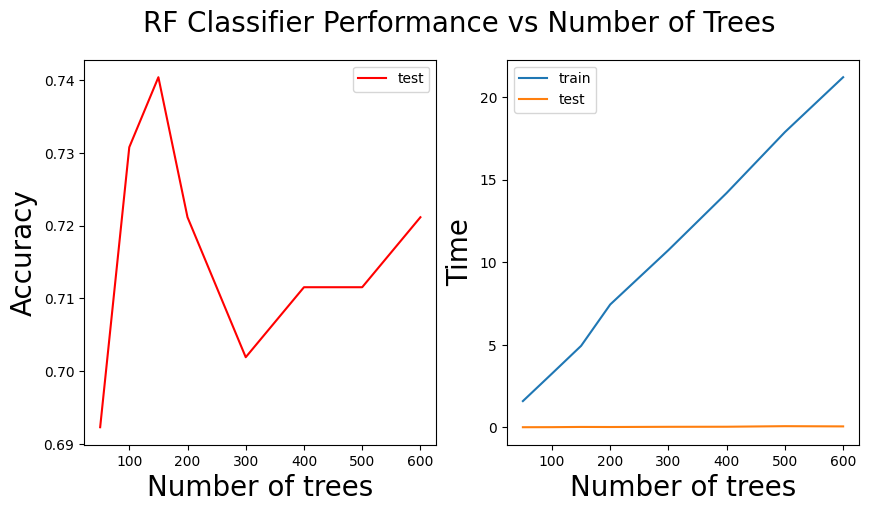

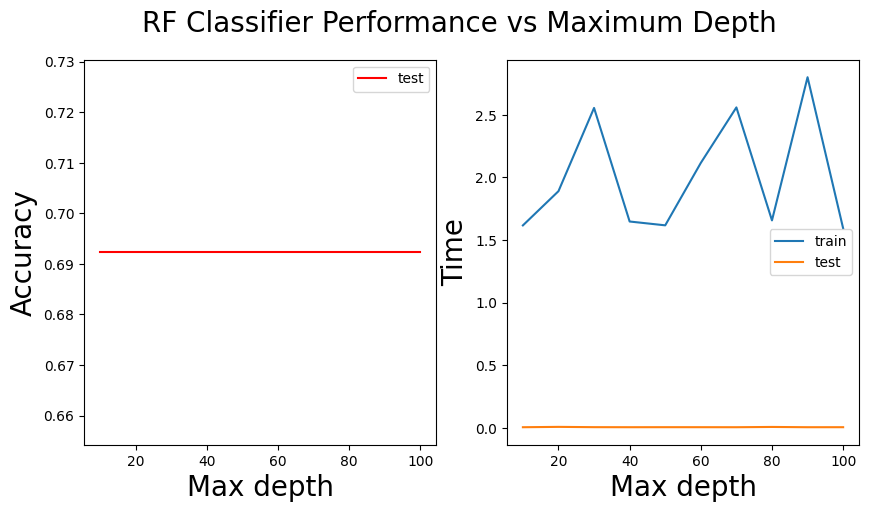

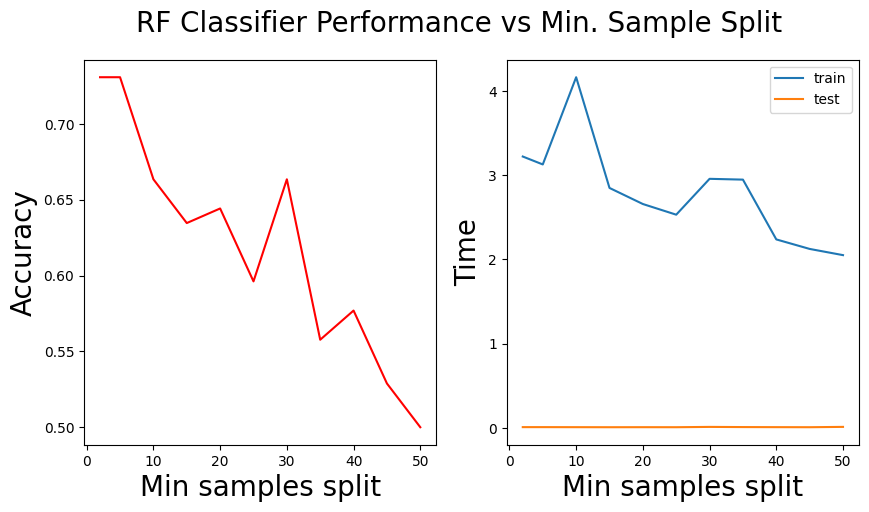

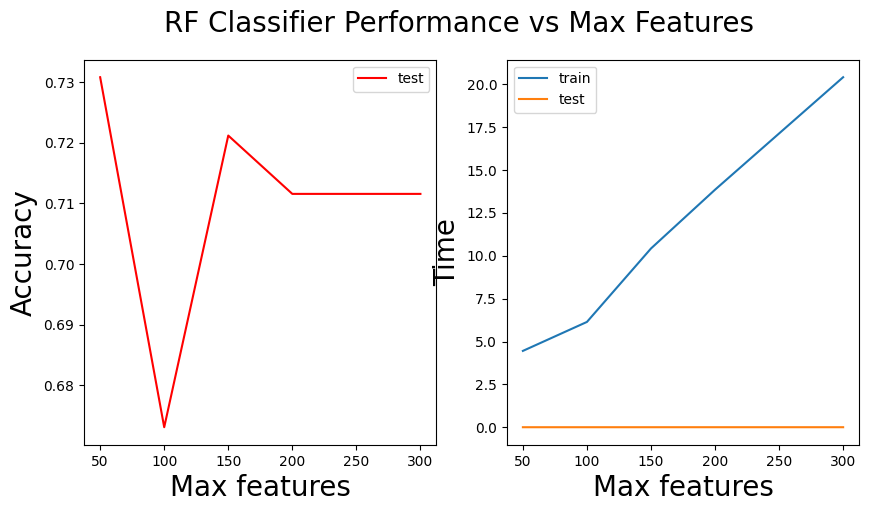

In [ ]:
#train the random forest classifier for a given number of trees for 50, 100, 150, 200, 300
#and plot the accuracy vs number of trees and time vs number of trees
n_estimators = [50, 100, 150, 200, 300, 400, 500, 600]
train_random_forest_classifier_numtrees_plot(n_estimators, train_set, train_labels, test_set, test_labels)

#train the random forest classifier for a given max_depth for 10, 20, 30, 40, 50
#and plot the accuracy vs max_depth and time vs max_depth
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
train_random_forest_classifier_max_depth_plot(max_depth, train_set, train_labels, test_set, test_labels)

#train the random forest classifier for a given min_samples_split for 2, 5, 10, 15, 20
#and plot the accuracy vs min_samples_split and time vs min_samples_split
min_samples_split = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
train_random_forest_classifier_min_samples_split_plot(min_samples_split, train_set, train_labels, test_set, test_labels)

#train the random forest classifier for a given max_features for 50, 100, 150, 200, 300
#and plot the accuracy vs max_features and time vs max_features
max_features = [50, 100, 150, 200, 300]
train_random_forest_classifier_max_features_plot(max_features, train_set, train_labels, test_set, test_labels)

In [ ]:
#apply random forest classifier with the best parameters
clf = RandomForestClassifier(n_estimators=200,
                            criterion = 'entropy',
                            min_samples_leaf=2,
                            min_samples_split =5,
                            max_depth = 100,
                            max_features = 100,
                            random_state=42)
start_time = time.time()
clf.fit(train_set.T, train_labels)
end_time = time.time()
print('Time taken to train the model: ', end_time - start_time)

#find the accuracy
accuracy = clf.score(test_set.T, test_labels)
print('Accuracy for Random Forest: ', round(accuracy, 2) * 100, '%')

Time taken to train the model:  22.168996572494507
Accuracy for Random Forest:  79.0 %


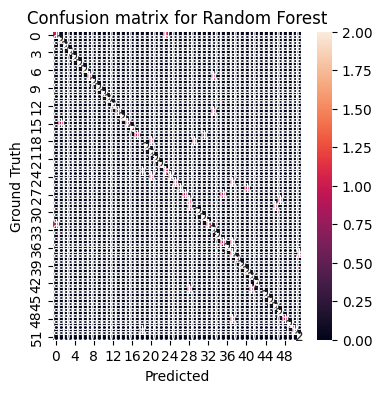

In [ ]:
#plot the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(test_labels, clf.predict(test_set.T)), annot=True, fmt='g')
plt.title('Confusion matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')
plt.show()

In [ ]:
#do random forest until a correct prediction is made and plot the given image and its label
def plot_recognition_random_forest(clf, test_set, test_labels):
    success = False
    failure = False
    for i, image in enumerate(test_set.T):
        predicted = int(clf.predict(image.reshape(1, -1)))
        original = test_labels[i]
        if predicted == original and not success:
            success = True
            #subplot original image and the reconstructed image
            fig = plt.figure(figsize=(4, 4))
            fig.add_subplot(1, 2, 1)
            plt.imshow(np.reshape(image, (46, 56)).T, cmap='gist_gray')
            plt.title('Original')
            plt.axis('off')
            fig.add_subplot(1, 2, 2)
            predicted_image_index = test_labels.index(predicted)
            predicted_image = np.reshape(test_set[:, predicted_image_index + 1], (46, 56)).T
            plt.imshow(predicted_image, cmap = 'gist_gray')
            plt.title("Right Pred.")
            plt.axis('off')
            plt.show()

        if predicted != original and not failure:
            failure = True
            #subplot original image and the reconstructed image
            fig = plt.figure(figsize=(4, 4))
            fig.add_subplot(1, 2, 1)
            plt.imshow(np.reshape(image, (46, 56)).T, cmap='gist_gray')
            plt.title('Original')
            plt.axis('off')
            fig.add_subplot(1, 2, 2)
            predicted_image_index = test_labels.index(predicted)
            predicted_image = np.reshape(test_set[:, predicted_image_index], (46, 56)).T
            plt.imshow(predicted_image, cmap = 'gist_gray')
            plt.title("Wrong Pred.")
            plt.axis('off')
            plt.show()

        if success and failure:
            break

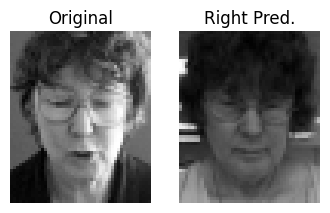

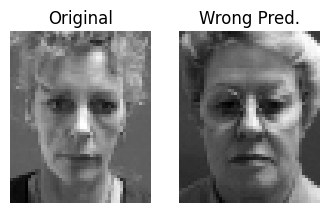

In [ ]:
plot_recognition_random_forest(clf, test_set, test_labels)